# Introduction to Annualized Volatility
**Bryan Chen**

$\quad$

记资产的日对数收益率为
$$R_t = {\rm log} \left( \frac{P_t}{P_{t-1}}\right),$$
则资产的年对数收益率
$$\begin{align}
R_{annual} &= \sum_{t = 1}^{D}{{\rm log} \left( \frac{P_t}{P_{t-1}}\right)} \nonumber \\
&= {\rm log} \prod_{t=1}^{D}{\left( \frac{P_t}{P_{t-1}}\right)} \nonumber \\
&= {\rm log} {\left( \frac{P_D}{P_0}\right)} \nonumber,
\end{align}$$
其中$D$为一年中的交易日天数。

若假设不同交易日之间的对数收益率相互独立且具有相同的方差$\sigma^2$，则年对数收益率的方差
$$\sigma^2_{annual} = D \sigma^2.$$
由此，其标准差
$$\sigma_{annual} = \sqrt{D} \sigma,$$
这就是量化交易中常说的年化波动率。

In [11]:
import numpy as np
from math import sqrt
import pandas as pd

ann_volatility = np.array([.2, .3, .4])
# 实践中通常取年交易日数为252天
D = 252
sigmaHat = ann_volatility/sqrt(D)

# 在不对数据分布做假设的情况下，我们无法构造价格的置信区间，
# 根据实践经验，我们不妨取均值两侧正负2sigma作为合理区间。
# 由于问题仅给出了年化波动率，没有对增长或亏损有倾向性，
# 我们不妨假设日对数收益率的均值为0。
muHat = 0
ucb = muHat + 2*sigmaHat
lcb = muHat - 2*sigmaHat
ucb = np.exp(ucb)
lcb = np.exp(lcb)
df = pd.DataFrame([ucb, lcb], index=["ucb", "lcb"], columns=["年化波动0.2", "年化波动0.3", "年化波动0.4"])
df

,年化波动0.2,年化波动0.3,年化波动0.4
ucb,1.025518,1.038520,1.051687
lcb,0.975117,0.962909,0.950854


上面Python代码运算的结果告诉我们：
- 当年化波动率为20%时，标的物价格每日的涨幅大概处于$(0.975, 1.026)$区间内；
- 当年化波动率为30%时，标的物价格每日的涨幅大概处于$(0.963, 1.039)$区间内；
- 当年化波动率为40%时，标的物价格每日的涨幅大概处于$(0.951, 1.052)$区间内。

下面我们假设日对数收益率服从正态分布，根据以上结论对标的物价格做一些模拟。

In [12]:
def priceGenerate(ann_volatility, muHat=0, P0=100, D=252, \
                  seed=20307110, diff_seed=False):
    """
        Generate prices given the annual volatility.
    """
    if not diff_seed:
        np.random.seed(seed)
    sigmaHat = ann_volatility/sqrt(D)
    logReturn = np.random.normal(muHat, sigmaHat, D)
    rate = np.exp(logReturn)
    rate[0] = rate[0] * P0
    for i in range(1, D):
        rate[i] = rate[i] * rate[i-1]
    price = np.insert(rate, 0, P0)
    return price

diff_seed = True
price20 = priceGenerate(.2, diff_seed=diff_seed)
price30 = priceGenerate(.3, diff_seed=diff_seed)
price40 = priceGenerate(.4, diff_seed=diff_seed)

price80 = priceGenerate(.8, diff_seed=diff_seed)
price100 = priceGenerate(1, diff_seed=diff_seed)
price150 = priceGenerate(1.5, diff_seed=diff_seed)

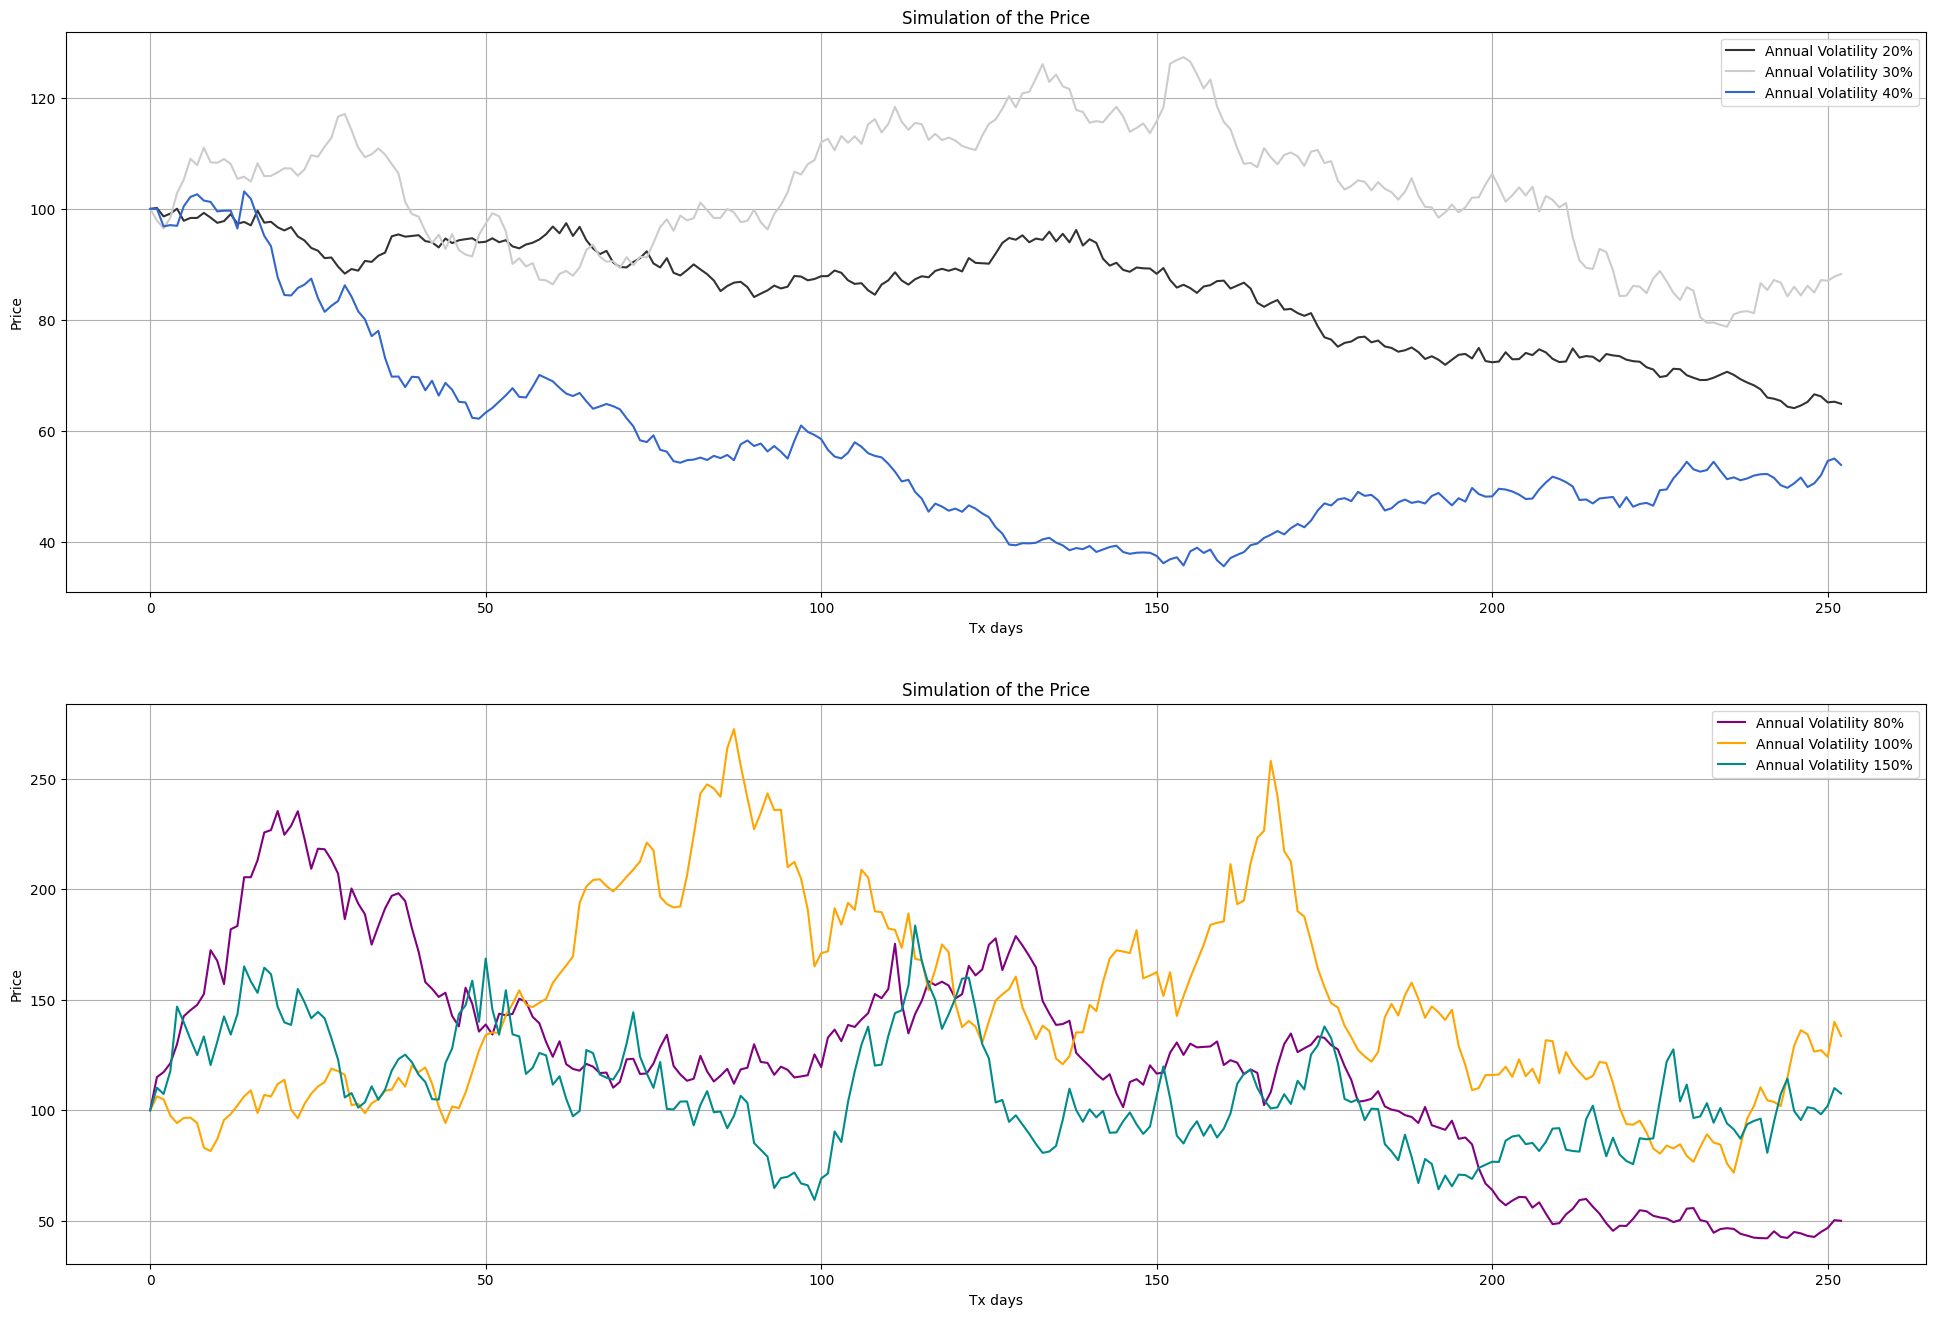

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(24, 16))

ax = fig.add_subplot(211)
ax.plot(price20, color = "#333333", label = "Annual Volatility 20%")
ax.plot(price30, color = "#CCCCCC", label = "Annual Volatility 30%")
ax.plot(price40, color = "#3366CC", label = "Annual Volatility 40%")
ax.legend()
ax.set_title("Simulation of the Price")
ax.set_xlabel("Tx days")
ax.set_ylabel("Price")
ax.grid()

ax2 = fig.add_subplot(212)
ax2.plot(price80, color = "#800080", label = "Annual Volatility 80%")
ax2.plot(price100, color = "#FFA500", label = "Annual Volatility 100%")
ax2.plot(price150, color = "#008B8B", label = "Annual Volatility 150%")
ax2.legend()
ax2.set_title("Simulation of the Price")
ax2.set_xlabel("Tx days")
ax2.set_ylabel("Price")
ax2.grid()

plt.show()